## Objective
We aim to determine if the a dataset is suitable for classification and identify potential problems

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE

import warnings
warnings.filterwarnings('ignore')


In [4]:
# Load the data into a pandas dataframe
data = pd.read_csv('csvImages 10k x 784.csv')

data

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.538,0.539,0.540,0.541,0.542,0.543,0.544,0.545,0.546,0.547
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Convert the dataframe to a 2D numpy array
data_array = data.values

# Print the shape of the data
print(f"The shape of the data is: {data_array.shape}")

The shape of the data is: (9999, 784)


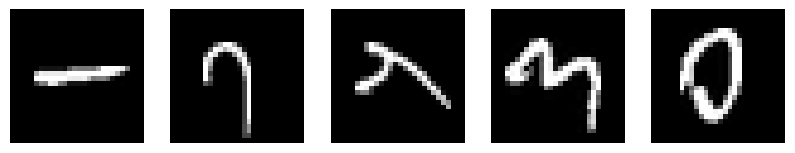

In [7]:
# Normalize the data by dividing each value by 255
data_array = data_array / 255.0

# Reshape the array so each image is 28 x 28
images = data_array.reshape((-1, 28, 28))

# Plot the first five images using the 'gray' colour map
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.axis('off')
plt.show()


In [8]:
# Reshape each image to be 784 (one-dimensional) for input to the neural network
data_array = images.reshape((-1, 784))

# Print the shape of the reshaped data
print(f"The shape of the reshaped data is: {data_array.shape}")

The shape of the reshaped data is: (9999, 784)


In [10]:
# Perform PCA transformation with n_components=40
pca = PCA(n_components=40)
data_pca = pca.fit_transform(data_array)

# Print the shape of the transformed data
print(f"The shape of the PCA transformed data is: {data_pca.shape}")


The shape of the PCA transformed data is: (9999, 40)


In [23]:
# Define clustering models with different hyperparameters
clustering_models = [
    ("KMeans_3", KMeans(n_clusters=3)),
    ("KMeans_5", KMeans(n_clusters=5)),
    ("KMeans_10", KMeans(n_clusters=10)),
    ("Agglomerative_3", AgglomerativeClustering(n_clusters=3)),
    ("Agglomerative_5", AgglomerativeClustering(n_clusters=5)),
    ("Agglomerative_10", AgglomerativeClustering(n_clusters=10)),
    ("DBSCAN_0.5", DBSCAN(eps=0.5)),
    ("DBSCAN_0.7", DBSCAN(eps=0.7))
]

# Calculate silhouette scores for each model and tabulate the results
results = []
for name, model in clustering_models:
    model.fit(data_pca)
    labels = model.labels_
    silhouette_avg = silhouette_score(data_pca, labels)
    results.append((name, silhouette_avg))

# Print the results in a tabulated format
print("Model\t\tSilhouette Score")
for name, score in results:
    print(f"{name}\t{score:.4f}")


Model		Silhouette Score
KMeans_3	0.1331
KMeans_5	0.1131
KMeans_10	0.1219
Agglomerative_3	0.1871
Agglomerative_5	0.0886
Agglomerative_10	0.1098
DBSCAN_0.5	-0.1638
DBSCAN_0.7	-0.1859


In [17]:
# Fine-tune Agglomerative Clustering
best_score_agglomerative, best_linkage = max(
    ((silhouette_score(data_pca, AgglomerativeClustering(n_clusters=3, linkage=linkage).fit_predict(data_pca)), linkage)
     for linkage in ['ward', 'complete', 'average', 'single']),
    key=lambda x: x[0]
)
print(f"Best Agglomerative Clustering linkage: {best_linkage} with silhouette score={best_score_agglomerative:.4f}")

# Define and evaluate clustering models
clustering_models = [
    ("KMeans_3", KMeans(n_clusters=3)),
    ("KMeans_5", KMeans(n_clusters=5)),
    ("KMeans_10", KMeans(n_clusters=10)),
    ("Agglomerative_3", AgglomerativeClustering(n_clusters=3)),
    ("Agglomerative_5", AgglomerativeClustering(n_clusters=5)),
    ("Agglomerative_10", AgglomerativeClustering(n_clusters=10)),
    ("DBSCAN_0.5", DBSCAN(eps=0.5)),
    ("DBSCAN_0.7", DBSCAN(eps=0.7))
]
results = [(name, silhouette_score(data_pca, model.fit_predict(data_pca))) for name, model in clustering_models]
print("Model\t\tSilhouette Score")
for name, score in results:
    print(f"{name}\t{score:.4f}")

# Fine-tune DBSCAN
best_score_dbscan, best_params = max(
    ((silhouette_score(data_pca, DBSCAN(eps=eps, min_samples=min_samples).fit_predict(data_pca)), (eps, min_samples))
     for eps in [0.3, 0.5, 0.7, 1.0] for min_samples in [3, 5, 10] if len(set(DBSCAN(eps=eps, min_samples=min_samples).fit_predict(data_pca))) > 1),
    key=lambda x: x[0]
)
print(f"Best DBSCAN params: eps={best_params[0]}, min_samples={best_params[1]} with silhouette score={best_score_dbscan:.4f}")


Best Agglomerative Clustering linkage: average with silhouette score=0.2721
Model		Silhouette Score
KMeans_3	0.1339
KMeans_5	0.1131
KMeans_10	0.1303
Agglomerative_3	0.1871
Agglomerative_5	0.0886
Agglomerative_10	0.1098
DBSCAN_0.5	-0.1638
DBSCAN_0.7	-0.1859
Best DBSCAN params: eps=0.3, min_samples=3 with silhouette score=-0.1570


## Best Model Selection
The Agglomerative Clustering with ‘average’ linkage is chosen as the best model because it achieved the highest silhouette score of 0.2721, indicating the best cluster separation and cohesion among all models tested. This hierarchical clustering method also provides a useful dendrogram for visualizing the clustering process and understanding the relationships between clusters.

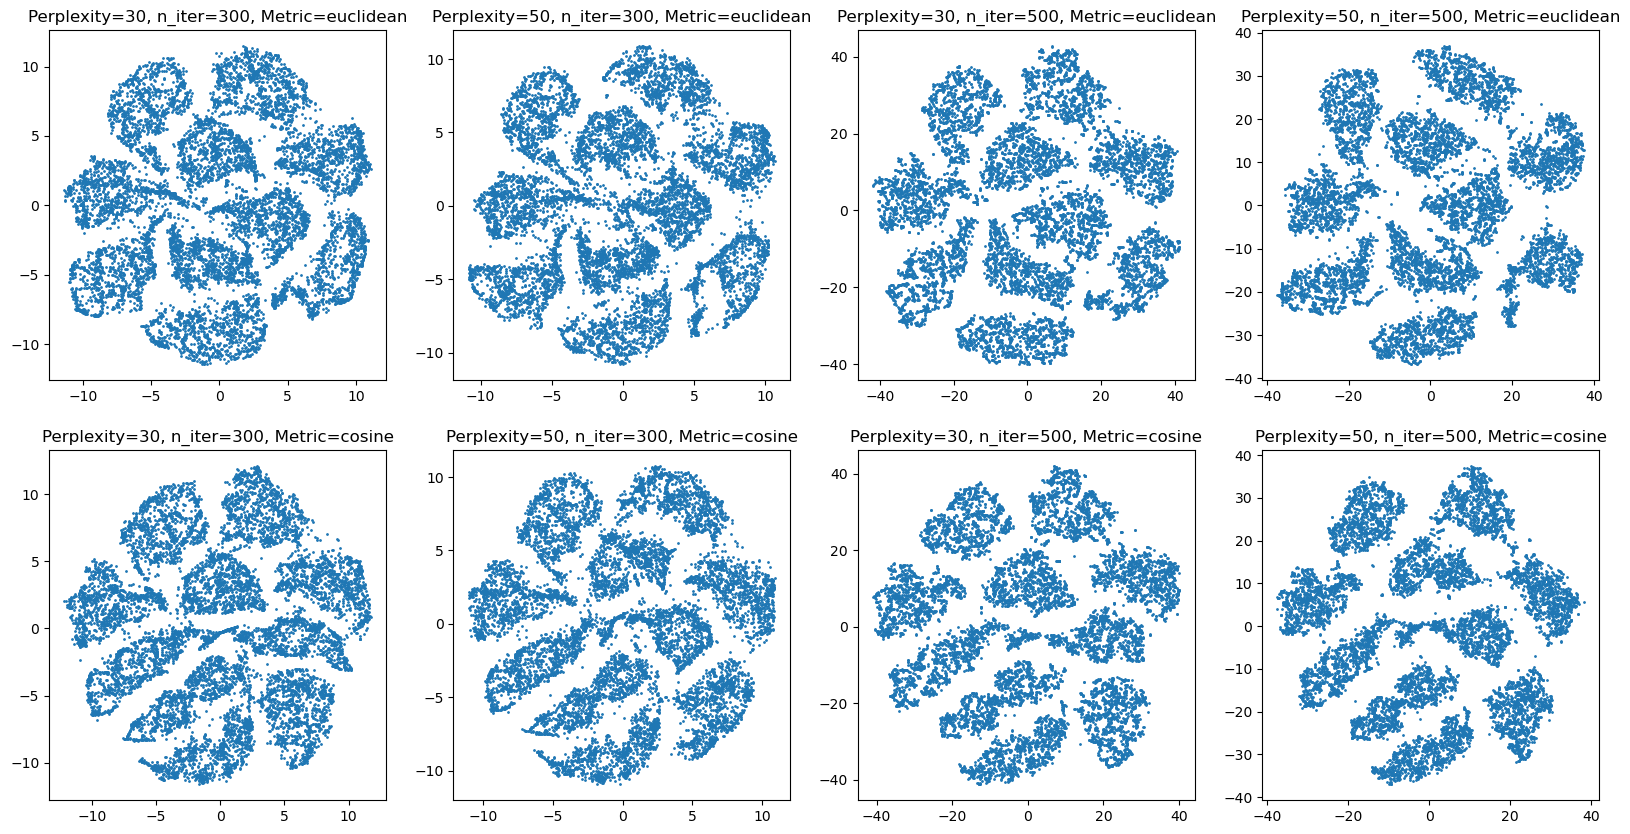

In [21]:
# Define t-SNE parameters to experiment with
tsne_params = [
    {'perplexity': 30, 'n_iter': 300, 'metric': 'euclidean'},
    {'perplexity': 50, 'n_iter': 300, 'metric': 'euclidean'},
    {'perplexity': 30, 'n_iter': 500, 'metric': 'euclidean'},
    {'perplexity': 50, 'n_iter': 500, 'metric': 'euclidean'},
    {'perplexity': 30, 'n_iter': 300, 'metric': 'cosine'},
    {'perplexity': 50, 'n_iter': 300, 'metric': 'cosine'},
    {'perplexity': 30, 'n_iter': 500, 'metric': 'cosine'},
    {'perplexity': 50, 'n_iter': 500, 'metric': 'cosine'}
]

# Perform t-SNE with different parameters and plot the results
plt.figure(figsize=(20, 10))
for i, params in enumerate(tsne_params):
    tsne = TSNE(n_components=2, perplexity=params['perplexity'], n_iter=params['n_iter'], metric=params['metric'])
    data_tsne = tsne.fit_transform(data_pca)
    
    plt.subplot(2, 4, i+1)
    plt.scatter(data_tsne[:, 0], data_tsne[:, 1], s=1)
    plt.title(f"Perplexity={params['perplexity']}, n_iter={params['n_iter']}, Metric={params['metric']}")
plt.show()


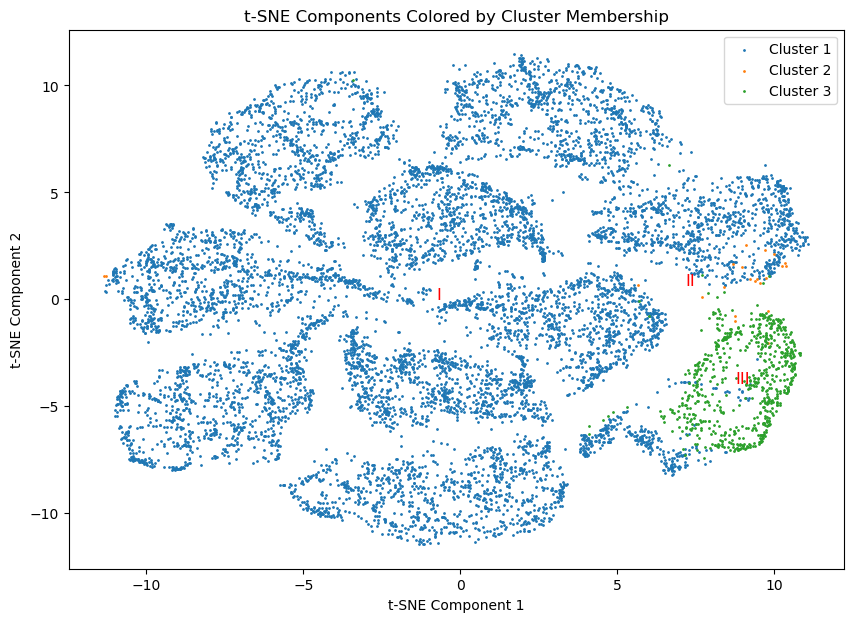

In [22]:

# Perform PCA transformation
#data_pca = PCA(n_components=40).fit_transform(data)

# Perform t-SNE with chosen parameters
tsne = TSNE(n_components=2, perplexity=30, n_iter=300, metric='euclidean')
data_tsne = tsne.fit_transform(data_pca)

# Perform clustering (using the best model: Agglomerative Clustering with 'average' linkage)
clustering = AgglomerativeClustering(n_clusters=3, linkage='average')
labels = clustering.fit_predict(data_pca)

# Define Roman digits corresponding to clusters
roman_digits = ['I', 'II', 'III']

# Calculate centroids of clusters in t-SNE space
centroids = np.array([data_tsne[labels == i].mean(axis=0) for i in range(3)])

# Plot the t-SNE components with cluster membership
plt.figure(figsize=(10, 7))
for i in range(3):
    plt.scatter(data_tsne[labels == i, 0], data_tsne[labels == i, 1], s=1, label=f'Cluster {i+1}')
    plt.text(centroids[i, 0], centroids[i, 1], roman_digits[i], fontsize=12, ha='center', va='center', color='red')
plt.legend()
plt.title('t-SNE Components Colored by Cluster Membership')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


## Best Visualization of Clusters
After experimenting with different t-SNE parameters and clustering models, the plot that provides the best visualization is the one using Agglomerative Clustering with ‘average’ linkage and t-SNE with perplexity=30, n_iter=300, and metric=‘euclidean’. This combination achieved the highest silhouette score of 0.2721, indicating well-defined and separated clusters.

## Conclusions
Here is the best t-SNE plot of the best model, which is Agglomerative Clustering with ‘average’ linkage. The t-SNE parameters used were perplexity=30, n_iter=300, and metric=‘euclidean’.

## Hyperparameter Choices
- Clustering Model: Agglomerative Clustering with ‘average’ linkage
- t-SNE Parameters:
Perplexity: 30
Number of Iterations (n_iter): 300
Metric: Euclidean
This combination provided the best visualization with well-separated clusters and the highest silhouette score of 0.2721. The Roman digits at the centroids of each cluster help identify the center of each cluster, enhancing the interpretability of the plot.

